# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
#from tabulate import tabulate 

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
print(data.head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

In [4]:
pd.set_option('max_rows', 20)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


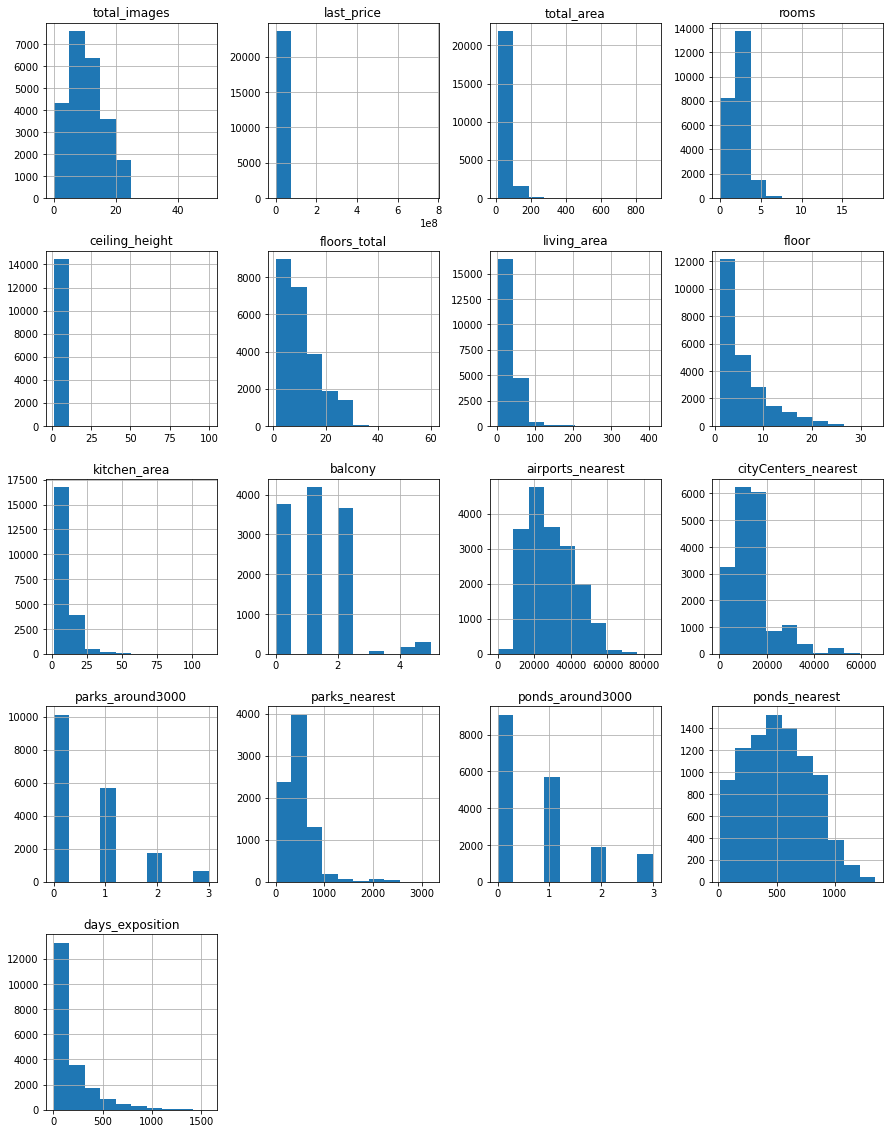

In [5]:
data.hist(figsize=(15, 20));

Пропуски есть в ячейках: 
* высота потолков, 
* жилая площадь, 
* апартаменты, 
* площадь кухни, 
* балкон, 
* расст. до аэропорта, 
* до центра, 
* парки 3000, 
* ближайшие парки, 
* пруды 3000, 
* ближайшие пруды, 
* дней в продаже.

Причины: 
* высота потолков - стандарт/не мерили, 
* жилая площадь - не вычисляли; 
* апартаменты - 90% нет, 
* площадь кухни - не придавали значения,
* балкон - 99,9% нет, 
* расст. до аэропорта - не считали/ошибка картографии, 
* до центра - не задумывались/ошибка картографии,
* парки 3000 - ошибка картографии
* ближайшие парки - не думали/ошибка картографии, 
* пруды 3000 - ошибка картографии,
* ближайшие пруды - /ошибка картографии,
* дней в продаже - ошибка вычислений или объект продан к моменту индексации.

is_apartment - перевести в тип bool (несоответствие из-за пропусков, изменится сам, после удаления пропусков)
<br>
floors_total - д.б. int64
<br>
balcony - д.б. int64
<br>
<br>
Выбросы есть по высоте потолков (более 10 м) <br> и общей площади: 12 м - это не квартира, 900 м - это ж стадион целый.

### Предобработка данных

In [6]:
# Смотрим кол-во пропусков по столбцам
for i in data:
    if len(data[data[i].isna()]) != 0:
        print(i, '-', len(data[data[i].isna()])) # выводим только пропуски

ceiling_height - 9195
floors_total - 86
living_area - 1903
is_apartment - 20924
kitchen_area - 2278
balcony - 11519
locality_name - 49
airports_nearest - 5542
cityCenters_nearest - 5519
parks_around3000 - 5518
parks_nearest - 15620
ponds_around3000 - 5518
ponds_nearest - 14589
days_exposition - 3181


Пропуски есть в ячейках: 
* высота потолков, 
* жилая площадь, 
* апартаменты, 
* площадь кухни, 
* балкон, 
* расст. до аэропорта, 
* до центра, 
* парки 3000, 
* ближайшие парки, 
* пруды 3000, 
* ближайшие пруды, 
* дней в продаже.

Причины: 
* высота потолков - стандарт/не мерили, 
* жилая площадь - не вычисляли; 
* апартаменты - 90% нет, 
* площадь кухни - не придавали значения,
* балкон - 99,9% нет, 
* расст. до аэропорта - не считали/ошибка картографии, 
* до центра - не задумывались/ошибка картографии,
* парки 3000 - ошибка картографии
* ближайшие парки - не думали/ошибка картографии, 
* пруды 3000 - ошибка картографии,
* ближайшие пруды - /ошибка картографии,
* дней в продаже - ошибка вычислений или объект продан к моменту индексации.

is_apartment - перевести в тип bool (несоответствие из-за пропусков, изменится сам, после удаления пропусков)
</b>
floors_total - д.б. int64
</b>
balcony - д.б. int64



In [7]:
#print('ceiling_height_min -', data['ceiling_height'].min())
#print('ceiling_height_max -', data['ceiling_height'].max())
#print(data['ceiling_height'].unique())
#print(data.groupby('ceiling_height')['rooms'].count().head(20))
#print(data.groupby('ceiling_height').agg({'rooms': 'count'}).tail(20))
print(data.groupby('floors_total')['rooms'].count().sort_values().tail(20))
#print(data['balcony'].unique())
#print(data.groupby('balcony')['balcony'].count())
#print(data['rooms'].unique())
#print(data['locality_name'].unique())
print(data['total_area'].min())
print(data['total_area'].max())
#print(data['total_area'].tail(10))

floors_total
22.00     286
19.00     339
23.00     352
15.00     365
2.00      383
8.00      390
24.00     469
18.00     505
14.00     553
7.00      592
3.00      668
17.00     833
6.00      914
25.00    1075
10.00    1174
4.00     1200
12.00    1362
16.00    1376
9.00     3761
5.00     5788
Name: rooms, dtype: int64
12.0
900.0


In [8]:
# Убираем пропуски в кол-ве балконов
data['balcony'] = data['balcony'].fillna(0) # Предполагаем НаН, как отсутствие балкона

In [9]:
# Убираем пропуски в возможности прописки
data['is_apartment'] = data['is_apartment'].fillna(False) # Предполагаем NaN, как "не апартаменты"

In [10]:
# Убираем пропуски в этажности зданий
# перебираем набор уникальных значений столбца floors_total
for i in data['floors_total'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых есть пропуски в floors_total и этажность меньше или равна 9 и записываем в них типовую застройку в 9 эт.
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= 9), 'floors_total'] = 9
    # во всех остальных строках, считаем этаж последним. 
    data.loc[(data['floors_total'].isna()), 'floors_total'] = data.loc[(data['floors_total'].isna()), 'floor']

In [11]:
# Работаем с высотой потолков
ceiling_height_median_before = data['ceiling_height'].median() # медиана до внесения изменений
ceiling_height_mean_before = data['ceiling_height'].mean() # среднее до внесения изменений

In [12]:
# перебираем уникальные значения столбца ceiling_height
for i in data['ceiling_height'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки с высотой более 10 м и уменьшаем её на порядок
    data.loc[(data['ceiling_height'] > 10), 'ceiling_height'] /= 10
# перебираем уникальные значения столбца ceiling_height
for i in data['ceiling_height'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки с высотой менее 2 м и увеличиваем на 1 м.
    data.loc[(data['ceiling_height'] < 2), 'ceiling_height'] += 1
# перебираем уникальные значения столбца ceiling_height
for i in data['ceiling_height'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки с высотой менее 2,2 м и увеличиваем на 0,2 м.
    data.loc[(data['ceiling_height'] < 2.2), 'ceiling_height'] += 0.2

In [13]:
ceiling_height_median_after = data['ceiling_height'].median() # медиана после внесения изменений
ceiling_height_mean_after = data['ceiling_height'].mean() # среднее после внесения изменений

In [14]:
print('ceiling_height_median_before -', ceiling_height_median_before)
print('ceiling_height_mean_before -', ceiling_height_mean_before)    
print('ceiling_height_median_after -', ceiling_height_median_after)
print('ceiling_height_mean_after -', ceiling_height_mean_after)
if ceiling_height_median_before == ceiling_height_median_after:
    print('Медиана не изменилась, ожидается мин. искажение данных')
if (ceiling_height_mean_before-ceiling_height_median_before) > (ceiling_height_mean_after-ceiling_height_median_after):
    print('Среднее подтянулось к медиане')

ceiling_height_median_before - 2.65
ceiling_height_mean_before - 2.77149889685604
ceiling_height_median_after - 2.65
ceiling_height_mean_after - 2.728637617209046
Медиана не изменилась, ожидается мин. искажение данных
Среднее подтянулось к медиане


In [15]:
# Теперь можно заменить пропуски на медиану
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median_after)

In [16]:
# Работаем с временем в продаже
print('days_exposition_median -', data['days_exposition'].median())
print('days_exposition_mean -', data['days_exposition'].mean())

days_exposition_median - 95.0
days_exposition_mean - 180.88863436982163


In [17]:
# Работаем по площадям
# перебираем уникальные значения столбца living_area
for i in data['living_area'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых есть пропуски в living_area и это студия 
    # записываем разницумежду общей площадью и мин. площадью "с/у+коридор+кух_зона" = 4 + 1 + 2
    data.loc[(data['living_area'].isna()) & (data['studio'] == True), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['studio'] == True), 'total_area'] - 7

In [18]:
# перебираем уникальные значения столбца living_area
for i in data['living_area'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых есть пропуски в living_area, kitchen_area и это студия 
    # всесто пропусков размера кух.зоны ставим 2 м, в студиях редко бывает больше
    data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 2

In [19]:
# перебираем уникальные значения столбца living_area
for i in data['living_area'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых есть пропуски в living_area и это 1 ккв. 
    # записываем разницумежду общей площадью и мин. площадью "с/у+коридор+кухня" = 4 + 2 + 6
    data.loc[(data['living_area'].isna()) & (data['rooms'] == 1), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['rooms'] == 1), 'total_area'] - 12

In [20]:
# перебираем уникальные значения столбца living_area
for i in data['living_area'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых есть пропуски в living_area, kitchen_area икомнат нет 
    # всесто пропусков размера жилой и кух.зоны ставим 0, видимо, это что-то GP
    data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['rooms'] == 0), 'kitchen_area'] = 0
    data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['rooms'] == 0), 'living_area'] = 0

In [21]:
# перебираем уникальные значения столбца living_area
for i in data['living_area'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых есть пропуски в living_area, kitchen_area не 0 и комнат нет 
    # всесто пропусков размера жилой ставим разницу м/у общей и кухней и отнимаем ещё 5 м (с/у и коридор)
    data.loc[(data['living_area'].isna()) & (data['kitchen_area']>0) & (data['rooms'] == 0), 'living_area'] = \
    data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['rooms'] == 0), 'total_area'] - \
    data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['rooms'] == 0), 'kitchen_area'] - 5

In [22]:
# перебираем уникальные значения столбца rooms
for i in data['rooms'].unique():
    # присваиваем пустым значениям медиану д. данного кол-ва комнат
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == i), 'kitchen_area'] = \
    data.loc[(data['kitchen_area'].isna() == False) & (data['rooms'] == i), 'kitchen_area'].median()

In [23]:
# перебираем уникальные значения столбца rooms
for i in data['rooms'].unique():
    # присваиваем пустым значениям разницу м/у общей, кухней, с/у (4+2) и коридором (2)
    data.loc[(data['living_area'].isna()) & (data['rooms'] == i), 'living_area'] = \
    data.loc[(data['living_area'].isna()) & (data['rooms'] == i), 'total_area'] - \
    data.loc[(data['living_area'].isna()) & (data['rooms'] == i), 'kitchen_area'] - 8

In [24]:
print(data['living_area'].mean())
print(data['living_area'].median())
print(data['kitchen_area'].mean())
print(data['kitchen_area'].median())

35.47079967559812
30.3
10.377513819148488
9.04


In [25]:
print(len(data['locality_name'].unique()))

365


In [26]:
def replace_duplicates_locality_name(row):
    try:
        if 'Кудрово' in row:
            return 'Кудрово'
        elif 'Мурино' in row:
            return 'Мурино'
        elif 'сад' in row:
            row = row.replace('товарищество ', '')
            row = row.replace('некоммерческое ', '')
            row = row.replace('садовое', 'садоводство')
            row = row.replace('садоводческое', 'садоводство')
        elif 'поселок' in row:
            row = row.replace('поселок', 'посёлок')
            if 'городск' in row:
                row = row.replace('городской ', '')
                row = row.replace('городского типа ', '')
            elif 'станции' in row:
                row = row.replace('станции ', '')
            elif 'коттеджный' in row:
                row = row.replace('коттеджный ', '')
            return row
        elif 'посёлок' in row:
            if 'городск' in row:
                row = row.replace('городской ', '')
                row = row.replace('городского типа ', '')
            elif 'станции' in row:
                row = row.replace('станции ', '')
            elif 'коттеджный' in row:
                row = row.replace('коттеджный ', '')
            return row

        else:
            return row
    except:
        return row

In [27]:
data['locality_name'] = data['locality_name'].apply(replace_duplicates_locality_name)
print(len(data['locality_name'].unique()))

314


In [28]:
# Удаляем строки без населённого пункта
data = data.dropna(how='any', subset=['locality_name'])

In [29]:
# Меняем тип данных
#print(data['floors_total'].unique())
data['floors_total'] = data['floors_total'].astype('int')
#print(data['floors_total'].unique())
#print()
#print(data['balcony'].unique())
data['balcony'] = data['balcony'].astype('int')
#print(data['balcony'].unique())
#data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [30]:
# Смотрим кол-во пропусков по столбцам
for i in data:
    if len(data[data[i].isna()]) != 0:
        print(i, '-', len(data[data[i].isna()])) # выводим только пропуски

airports_nearest - 5528
cityCenters_nearest - 5505
parks_around3000 - 5504
parks_nearest - 15580
ponds_around3000 - 5504
ponds_nearest - 14559
days_exposition - 3179


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23644 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23644 non-null  int64  
 1   last_price            23644 non-null  float64
 2   total_area            23644 non-null  float64
 3   first_day_exposition  23644 non-null  object 
 4   rooms                 23644 non-null  int64  
 5   ceiling_height        23644 non-null  float64
 6   floors_total          23644 non-null  int64  
 7   living_area           23644 non-null  float64
 8   floor                 23644 non-null  int64  
 9   is_apartment          23644 non-null  bool   
 10  studio                23644 non-null  bool   
 11  open_plan             23644 non-null  bool   
 12  kitchen_area          23644 non-null  float64
 13  balcony               23644 non-null  int64  
 14  locality_name         23644 non-null  object 
 15  airports_nearest   

In [32]:
display(data[['last_price', 'total_area', 'rooms', 'living_area', 'floor', 'kitchen_area', 'floors_total', 'ceiling_height']].sort_values(by='last_price', ascending=False).head(10))
display(data[['last_price', 'total_area', 'rooms', 'living_area', 'floor', 'kitchen_area', 'floors_total', 'ceiling_height']].sort_values(by='last_price', ascending=False).head(10))
display(data[['last_price', 'total_area', 'rooms', 'living_area', 'floor', 'kitchen_area', 'floors_total', 'ceiling_height']].sort_values(by='rooms', ascending=False).head(10))
display(data[['last_price', 'total_area', 'rooms', 'living_area', 'floor', 'kitchen_area', 'floors_total', 'ceiling_height']].sort_values(by='total_area', ascending=False).head(10))

,last_price,total_area,rooms,living_area,floor,kitchen_area,floors_total,ceiling_height
12971,763000000.00,400.00,7,250.00,10,20.00,10,2.65
19540,420000000.00,900.00,12,409.70,25,112.00,25,2.80
14706,401300000.00,401.00,5,204.00,9,24.00,9,2.65
1436,330000000.00,190.00,3,95.00,5,40.00,7,3.50
15651,300000000.00,618.00,7,258.00,5,70.00,7,3.40
22831,289238400.00,187.50,2,63.70,6,30.20,6,3.37
16461,245000000.00,285.70,6,182.80,4,29.80,7,3.35
13749,240000000.00,410.00,6,218.00,7,40.00,7,3.40
5893,230000000.00,500.00,6,452.00,7,40.00,7,2.65
8900,190870000.00,268.00,3,132.00,7,40.00,8,2.65


,last_price,total_area,rooms,living_area,floor,kitchen_area,floors_total,ceiling_height
12971,763000000.00,400.00,7,250.00,10,20.00,10,2.65
19540,420000000.00,900.00,12,409.70,25,112.00,25,2.80
14706,401300000.00,401.00,5,204.00,9,24.00,9,2.65
1436,330000000.00,190.00,3,95.00,5,40.00,7,3.50
15651,300000000.00,618.00,7,258.00,5,70.00,7,3.40
22831,289238400.00,187.50,2,63.70,6,30.20,6,3.37
16461,245000000.00,285.70,6,182.80,4,29.80,7,3.35
13749,240000000.00,410.00,6,218.00,7,40.00,7,3.40
5893,230000000.00,500.00,6,452.00,7,40.00,7,2.65
8900,190870000.00,268.00,3,132.00,7,40.00,8,2.65


,last_price,total_area,rooms,living_area,floor,kitchen_area,floors_total,ceiling_height
14498,32250000.00,374.60,19,264.50,2,27.60,5,2.65
18848,28500000.00,270.00,16,180.00,4,13.00,4,3.00
5358,65000000.00,590.00,15,409.00,3,100.00,6,3.50
20829,28659000.00,245.40,14,168.30,2,25.90,4,2.65
866,25000000.00,363.00,14,222.00,4,16.60,5,3.16
19540,420000000.00,900.00,12,409.70,25,112.00,25,2.80
9688,33000000.00,194.10,11,129.00,2,11.90,5,3.43
648,17500000.00,183.70,11,138.80,7,13.30,7,3.40
18119,15500000.00,216.10,10,161.40,2,19.80,5,3.15
18891,40000000.00,290.00,10,189.40,6,30.00,6,3.50


,last_price,total_area,rooms,living_area,floor,kitchen_area,floors_total,ceiling_height
19540,420000000.00,900.00,12,409.70,25,112.00,25,2.80
12859,140000000.00,631.20,7,322.30,4,19.50,4,3.90
3117,140000000.00,631.00,7,563.00,5,60.00,5,2.65
15651,300000000.00,618.00,7,258.00,5,70.00,7,3.40
5358,65000000.00,590.00,15,409.00,3,100.00,6,3.50
4237,50000000.00,517.00,7,332.00,3,22.00,4,2.65
8018,84000000.00,507.00,5,301.50,7,45.50,7,4.45
15016,150000000.00,500.00,4,480.90,7,11.10,7,3.20
5893,230000000.00,500.00,6,452.00,7,40.00,7,2.65
12401,91500000.00,495.00,7,347.50,7,25.00,7,4.65


In [33]:
#print(data.shape)
#data[data['total_area' > 200], 'total_area'].value_counts().to_frame().tail(20)
print(data.query('total_area > 300').total_area.value_counts().to_frame())
old_data_shape = data.shape

        total_area
400.00           3
310.00           2
365.00           2
500.00           2
380.00           2
...            ...
374.00           1
398.00           1
470.30           1
356.00           1
316.30           1

[54 rows x 1 columns]


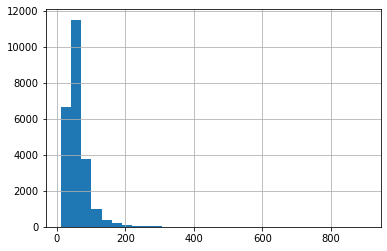

In [34]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

199.2
0.9887497885298596


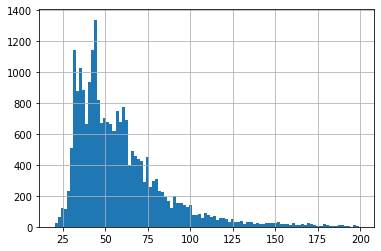

In [35]:
data = data.loc[data['total_area'] < 200]
data = data.loc[data['total_area'] > 20]
print(data['total_area'].max())
new_data_shape = data.shape
print(new_data_shape[0] / old_data_shape[0])
data['total_area'].hist(bins=100);

19999000.0
12190.0
(22844, 22)
0.9661647775334122


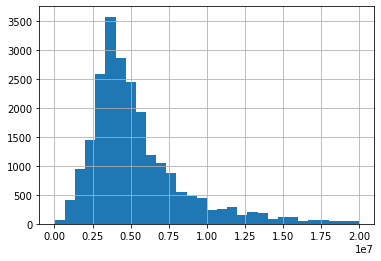

In [36]:
data = data.loc[data['last_price'] < 20000000]
data = data.loc[data['last_price'] > 20]
print(data['last_price'].max())
print(data['last_price'].min())
new_data_shape = data.shape
print(new_data_shape)
print(new_data_shape[0] / old_data_shape[0])
data['last_price'].hist(bins=30);

5
(22593, 22)
0.9555489764845204


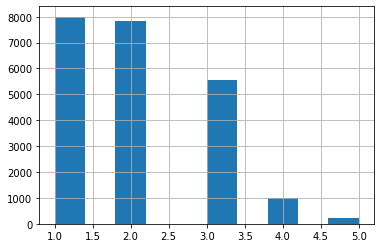

In [37]:
#print(data['rooms'].unique().count_values())
data = data.loc[data['rooms'] < 6]
data = data.loc[data['rooms'] > 0]
print(data['rooms'].max())
data['rooms'].hist();
new_data_shape = data.shape
print(new_data_shape)
print(new_data_shape[0] / old_data_shape[0])

In [38]:
data['living_area'].min()

2.0

### Добавим в таблицу новые столбцы

In [39]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['weekday_exposition'] =  pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] =  pd.DatetimeIndex(data['first_day_exposition']).year

for i in data['floors_total']:
    data.loc[(data['floor'] != i), 'floor_type'] = 'Другой'
    data.loc[(data['floor'] == i), 'floor_type'] = 'Последний'
    data.loc[(data['floor'] == 1), 'floor_type'] = 'Первый'

data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [40]:
#print(data.head(20))

### Исследовательский анализ данных

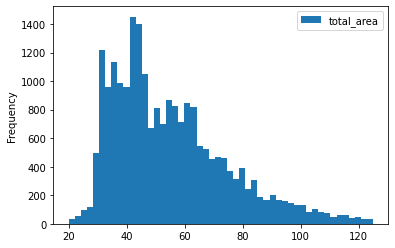

In [41]:
data.plot(y='total_area', kind='hist', bins=50, range=(20, 125));

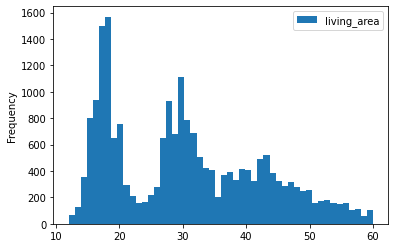

In [42]:
data.plot(y='living_area', kind='hist', bins=50, range=(12, 60));

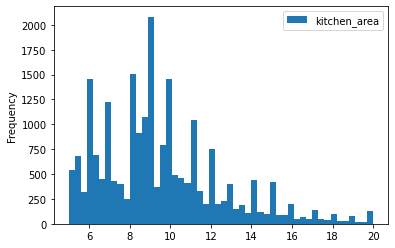

In [43]:
data.plot(y='kitchen_area', kind='hist', bins=50, range=(5, 20));

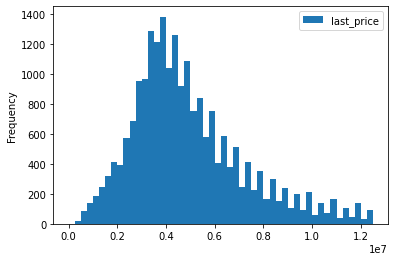

In [44]:
data.plot(y='last_price', kind='hist', bins=50, range=(12, 12500000));

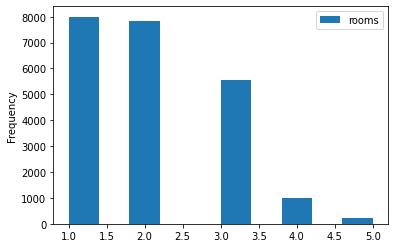

In [45]:
data.plot(y='rooms', kind='hist', range=(1, 5));

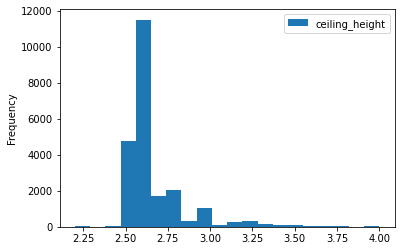

In [46]:
data.plot(y='ceiling_height', kind='hist', bins=20, range=(2.2, 4));

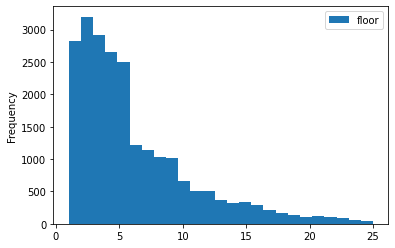

In [47]:
data.plot(y='floor', kind='hist', bins=25, range=(1, 25));

            count
            floor
floor_type       
Другой      17264
Первый       2832
Последний    2497


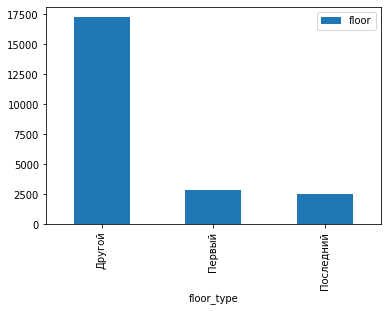

In [48]:
print(data.pivot_table(index='floor_type', values='floor', aggfunc=['count']))
#data.pivot_table(index='floor_type', values='floor', aggfunc=['count']).plot(y='count')
data.pivot_table(index='floor_type', values='floor', aggfunc=['count']).plot(y='count', kind='bar');

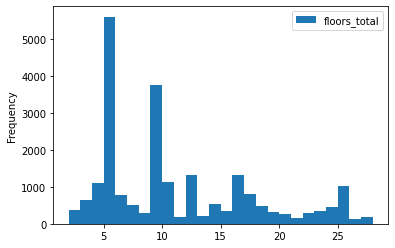

In [49]:
data.plot(y='floors_total', kind='hist', bins=26, range=(2, 28));

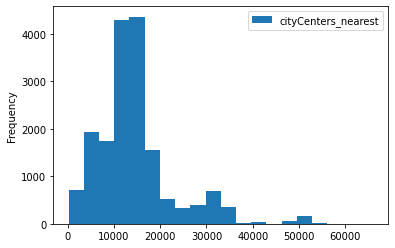

In [50]:
data.plot(y='cityCenters_nearest', kind='hist', bins=20);

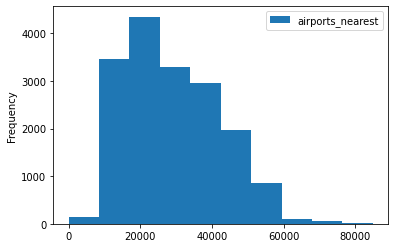

In [51]:
data.plot(y='airports_nearest', kind='hist', bins=10);

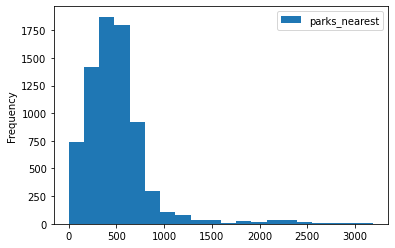

In [52]:
data.plot(y='parks_nearest', kind='hist', bins=20);

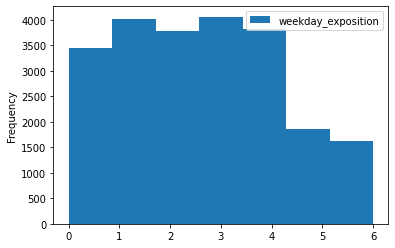

In [53]:
data.plot(y='weekday_exposition', kind='hist', bins=7);

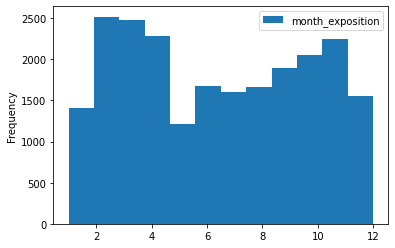

In [54]:
data.plot(y='month_exposition', kind='hist', bins=12, label='month_exposition');

### Наблюдения

1. Большинство кв. площадью 40 м.кв. (страно, т.к., п.5), след. 30 м.кв. (ожидаемо, т.к., п.5)
2. Жиля площадь 15-18 м.кв. (ожидаемо, т.к., п.3), 30-35 (ожидаемо, т.к., п.3)
3. Площадь кухни 9 м.кв. (ожидаемо, т.к., п.9), затем - 5, 6, 10 м.кв. (ожидаемо, т.к., п.9)
4. Цена в диапазоне от 3 до 5 млн.
5. Самые продаваемые кв. - однушки, затем - 2 ккв., и с большим отставанием - 3 ккв., остальные совсем в хвосте  списка.
6. Высота потолков, в основном, 2.5 - 2.7 м. (т.к., п.9)
7. Наиб. кол-во с 1 по 5 эт, затем до 9 эт. Т.к., п.9
8. Ожидаемо: некрайних этажей больше, т.к. их в массе своей больше раз в 5.
9. Большинство кв. в домах сов. застройки 5 и 9 эт.
9. Основная масса кв. нах-ся на расст. 10-15 км от центра, Неудивительно, т.к. СПб - лепесток с радиусом 20 км. 
10. Люди традиционно не стремятся жить возле аэропорта. Большинство кв. в 20 км.
11. Достатлчно много парков в СПб и ЛО. Превалирующее расстояние 300 - 800 м.
12. Большинство объявлений подаются в четверг (дела на работе сделаны, можно и личным позаниматься) и вторник (понедельник - день тяжёлый :) ).
13. Самый активный месяц по подаче - март, затем апрель и май. Весна традиционное время активизации продаж квартир и автомобилей. Равно как и ноябрь - закончить до конца года.

94.0
178.0237029501526


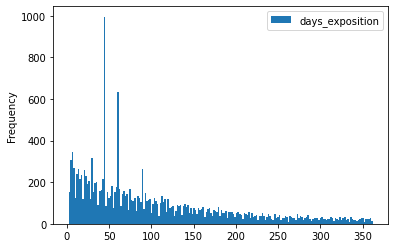

In [55]:
data.plot(y='days_exposition', kind='hist', bins=200, range=(2, 362))
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

В основном кв. продаются за 3 мес. Имеются и быстрые продажи - за 1.5. Среднее искажено, т.к. много продаж с большим сроком экспонирования. Аномально долгими можно считать продажи долише полугода, но это связано с моножеством факторов (объединим их термином "эксклюзивность").

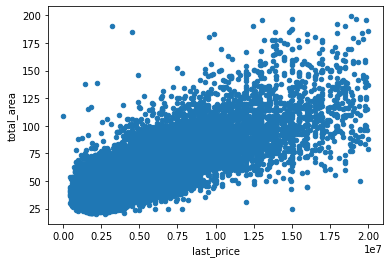

In [56]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=1);

Зависимость цены от площади имеется, но не прямо пропорциональна, влияют др. параметры.

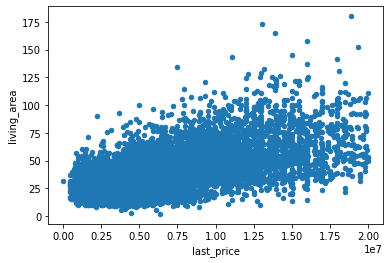

In [57]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=1);

Зависимость цены от площади имеется, но не прямо пропорциональна, влияют др. параметры.

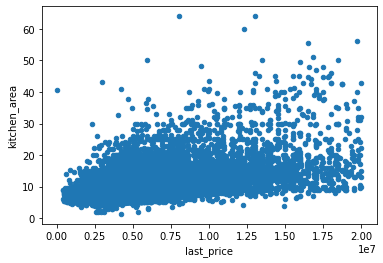

In [58]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=1);

Зависимость цены от площади имеется, но не прямо пропорциональна, влияют др. параметры.

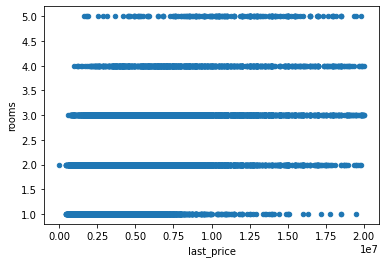

In [59]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=1);

Не зависимые величины.

           median           
            floor last_price
floor_type                  
Другой          4 4700000.00
Первый          1 3900000.00
Последний       5 4300000.00


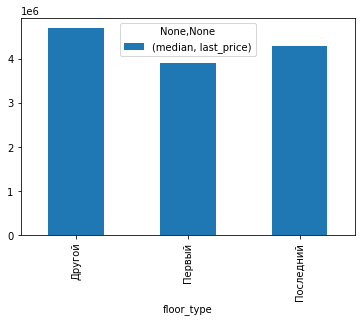

In [60]:
print(data.pivot_table(index='floor_type', values=['floor', 'last_price'], aggfunc=['median']))
#data.pivot_table(index='floor_type', values='floor', aggfunc=['count']).plot(y='count')
data.pivot_table(index='floor_type', values=['floor', 'last_price'], aggfunc=['median']).plot(y=[('median', 'last_price')], kind='bar');

Цена первого этажа самая низкая, затем - последний, следом - все остальные.

                   median           
                    floor last_price
weekday_exposition                  
0                       4 4590000.00
1                       4 4650000.00
2                       4 4600000.00
3                       4 4550000.00
4                       4 4500000.00
5                       4 4500000.00
6                       4 4500000.00


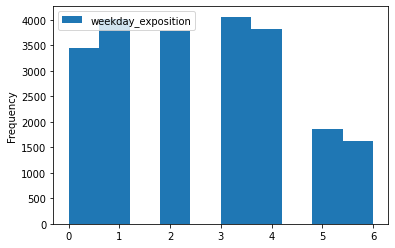

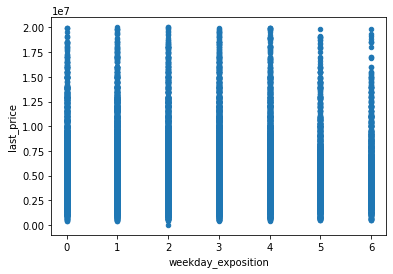

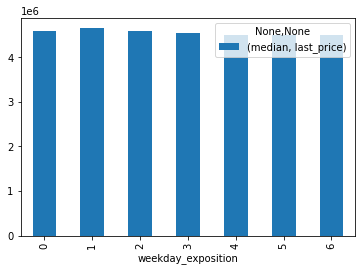

In [61]:
data.plot(x='last_price', y='weekday_exposition', kind='hist', alpha=1);
data.plot(y='last_price', x='weekday_exposition', kind='scatter', alpha=1);
print(data.pivot_table(index='weekday_exposition', values=['floor', 'last_price'], aggfunc=['median']))
data.pivot_table(index='weekday_exposition', values=['floor', 'last_price'], aggfunc=['median']).plot(y=[('median', 'last_price')], kind='bar');

             median           
              floor last_price
floors_total                  
1                 1 2300000.00
2                 1 1990000.00
3                 2 3600000.00
4                 3 5600000.00
5                 3 3600000.00
...             ...        ...
35               14 7170000.00
36               28 8150000.00
37                5 4100000.00
52               18 3978000.00
60                4 3800000.00

[36 rows x 2 columns]


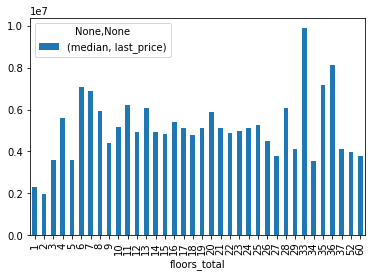

In [62]:
print(data.pivot_table(index='floors_total', values=['floor', 'last_price'], aggfunc=['median']))
data.pivot_table(index='floors_total', values=['floor', 'last_price'], aggfunc=['median']).plot(y=[('median', 'last_price')], kind='bar');

                 median           
                  floor last_price
month_exposition                  
1                     4 4500000.00
2                     4 4585000.00
3                     4 4595000.00
4                     4 4700000.00
5                     4 4500000.00
6                     4 4300000.00
7                     5 4550000.00
8                     4 4510000.00
9                     5 4650000.00
10                    4 4500000.00
11                    4 4647000.00
12                    4 4600000.00


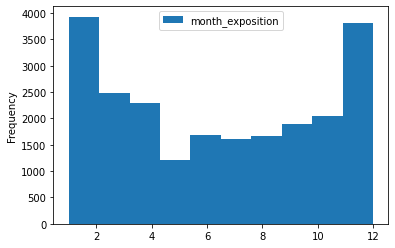

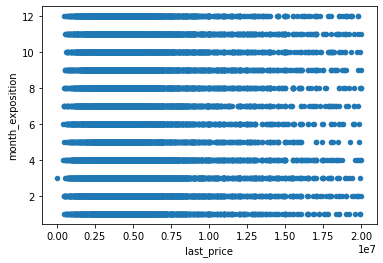

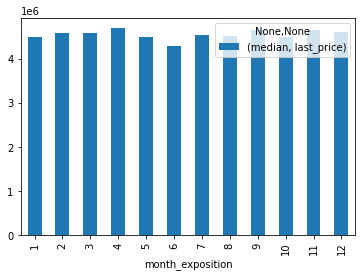

In [63]:
data.plot(x='last_price', y='month_exposition', kind='hist', alpha=1);
data.plot(x='last_price', y='month_exposition', kind='scatter', alpha=1);
print(data.pivot_table(index='month_exposition', values=['floor', 'last_price'], aggfunc=['median']))
data.pivot_table(index='month_exposition', values=['floor', 'last_price'], aggfunc=['median']).plot(y=[('median', 'last_price')], kind='bar');

                median           
                 floor last_price
year_exposition                  
2014                 4 6445000.00
2015                 4 5100000.00
2016                 4 4416770.50
2017                 4 4450000.00
2018                 4 4500000.00
2019                 4 4999000.00


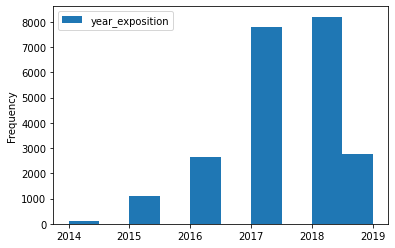

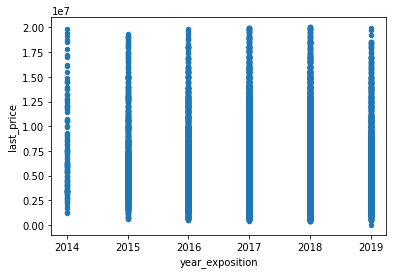

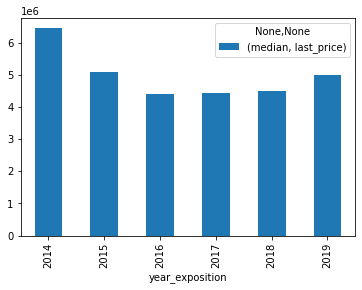

In [64]:
data.plot(x='last_price', y='year_exposition', kind='hist', alpha=1);
data.plot(y='last_price', x='year_exposition', kind='scatter', alpha=1);
print(data.pivot_table(index='year_exposition', values=['floor', 'last_price'], aggfunc=['median']))
data.pivot_table(index='year_exposition', values=['floor', 'last_price'], aggfunc=['median']).plot(y=[('median', 'last_price')], kind='bar');

Наибольшая цена в 14 году, затем падение к 16 и медленный рост к 19-му.

                            count            mean
                  price_per_meter price_per_meter
locality_name                                    
Санкт-Петербург             14795       108609.07
Мурино                        561        85439.37
Кудрово                       451        95150.96
посёлок Шушары                436        78405.74
Всеволожск                    390        67180.36
Пушкин                        357       101906.85
Колпино                       337        75333.30
посёлок Парголово             322        90448.42
Гатчина                       307        68746.15
Выборг                        237        58141.91


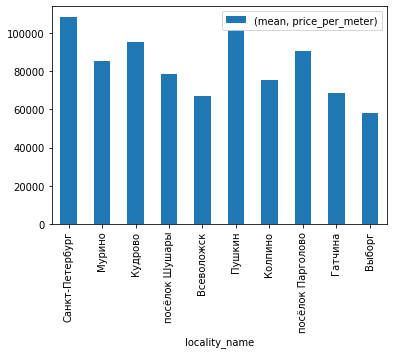

In [65]:
# Выберем топ-10 по кол-ву продаж
print(data.pivot_table(index='locality_name',values=['price_per_meter'], aggfunc=['count', 'mean']).sort_values(by=[('count', 'price_per_meter')], ascending=False).head(10))
data.pivot_table(index='locality_name',values=['price_per_meter'], aggfunc=['count', 'mean']).sort_values(by=[('count', 'price_per_meter')], ascending=False).head(10).plot(y=[('mean', 'price_per_meter')], kind='bar', label=[('mean', 'price_per_meter')]);

Санкт-Петербург - самый дорогой м.кв.
</br>
Выборг - аутсайдер в нашем топ-10.

In [66]:
def replace_0_km(km):
    try:
        if km == 0:
            return 1
        else:
            return km
    except:
        return km

In [67]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
#print(data_spb['cityCenters_nearest_km'].unique())
data_spb = data_spb.dropna(subset=['cityCenters_nearest_km'])
#print(data_spb['cityCenters_nearest_km'].unique())
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].apply(replace_0_km) # не бывает 0
#print(data_spb['cityCenters_nearest_km'].unique())

In [68]:
print(data_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc=['mean']).head(20))

                                  mean
                       price_per_meter
cityCenters_nearest_km                
1.00                         127340.34
2.00                         124174.71
3.00                         113976.98
4.00                         121388.41
5.00                         126211.49
6.00                         127137.71
7.00                         124096.78
8.00                         121387.31
9.00                         110178.40
10.00                        111333.92
11.00                        107465.36
12.00                        107032.06
13.00                        107436.75
14.00                        103914.68
15.00                        103879.90
16.00                        100111.16
17.00                         96123.21
18.00                         96317.79
19.00                         98703.65
20.00                        101414.92


Шаговая доступность центра увеличивает стоимость 1 м.кв., дальше зависит от района и ЖК

### Общий вывод

В проведённом исследовании были устранены явные и неявные дубликаты данных, устранены пропуски путём заполнения отсутствующих значений, исправлены неверные данные о высоте потолков, получена цена одного квадратного метра для каждого неселённого пункта, определены типичное время продажи кватиры и аномально долгие продажи, изучены зависимости цены от общей/жилой/кухонной площади, количества комнат, этажа квартиры, даты размещения (день недели, месяц, год).различных факторов: 

Самая продаваемая: 
1 ккв., общей площадью 30-40 м.кв., жилой - около 18 м.кв. (+/-3 м.кв.), с кухней прим. 9 м.кв., по мин. цене, со стд. высотой потолка, в пятиэтажке, не крайние этажи, на расст. 10-15 км от центра, подальше от аэропорта, недалеко от парка.

В основном кв. продаются за 3 мес. 

Наибольшая активность проявляется в рабочие дни и в декабре-январе.

Наибольшие цены зафиксированы в апреле, сентябре и ноябре.

Зависимость цены от площади имеется, но не линейна, влияют др. параметры.

Цена первого этажа самая низкая, затем - последний, следом - все остальные.

Санкт-Петербург - самый дорогой м.кв.
</br>
Выборг - аутсайдер в нашем топ-10.

Шаговая доступность центра увеличивает стоимость 1 м.кв. Самый дорогой метр в радиусе 1 км, затем до 8 км, следом - 16 км, дальше зависит от района и ЖК.

Цена жилья упала с 2014 к 2016, а затем постоянно растёт, но к 2019 не достигла уровня 2015.